In [16]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#### 1. Load Data

In [17]:
# load data
df = pd.read_csv('../../data/H2.csv')

#### 2. Pre-Prepare the Data

In [18]:
# Handle missing values
df["Children"].fillna(0, inplace=True)  # Fill missing 'Children' with 0
df["Country"].fillna("Unknown", inplace=True)  # Fill missing 'Country' with 'Unknown'

# Drop rows where adults, babies and children are zero at the same time
df = df[(df["Adults"] != 0) | (df["Babies"] != 0) | (df["Children"] != 0)]

# Check for missing values
missing_values = df.isnull().sum().any()
missing_values

np.False_

In [19]:
# Drop Duplicate rows
print(f"Total Number of Rows: {len(df)}")
print(f"Total Number of Rows without Duplicates: {len(df.drop_duplicates())}")

df = df.drop_duplicates()

Total Number of Rows: 79163
Total Number of Rows without Duplicates: 53274


`ADR` feature will be the target variable

In [22]:
# ADR (Average Daily Rate) is a continuous variable and we can use the describe method to get the summary statistics
adr_stats = df["ADR"].describe()
adr_stats

count    53274.000000
mean       111.271969
std         47.801588
min          0.000000
25%         84.150000
50%        105.300000
75%        134.100000
max       5400.000000
Name: ADR, dtype: float64

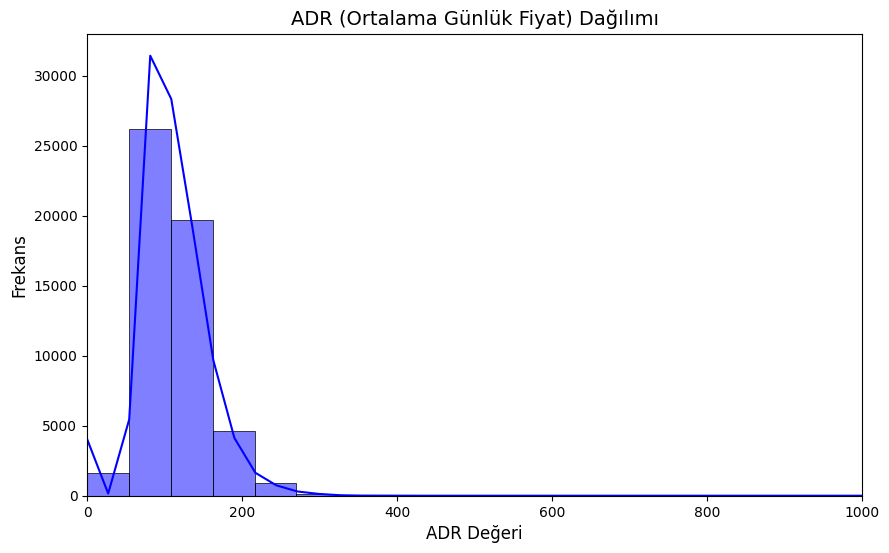

In [23]:
# Visualize the distribution of ADR
plt.figure(figsize=(10, 6))
sns.histplot(df['ADR'], bins=100, kde=True, color='blue')
plt.title('ADR (Average Daily Rate) Dağılımı', fontsize=14)
plt.xlabel('ADR Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 1000)  # Limit the x-axis to 1000
plt.show()

After 1000 is rare, probably we can assume as outlier values

In [24]:
# Let's determine the boundaries of outliers with the IQR (Interquartile Range) method.
Q1 = df["ADR"].quantile(0.25)
Q3 = df["ADR"].quantile(0.75)
IQR = Q3 - Q1

# Let's calculate the lower and upper limits (1.5 * IQR rule).
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Let's check the number of outliers.
outliers = df[(df["ADR"] < lower_bound) | (df["ADR"] > upper_bound)]
outlier_count = outliers.shape[0]

lower_bound, upper_bound, outlier_count

(np.float64(9.225000000000023), np.float64(209.02499999999998), 2369)

- Lower Bound: _9.23_
- Upper Bound: _209.02_
- Number of Outliers: _2,369_

Let's use the Winsorizing (Limitation) method to lower and upper limits the ADR values.
- Values ​​above the upper limit are equal to _209.02_, and values ​​below the lower limit are equal to _9.23_.

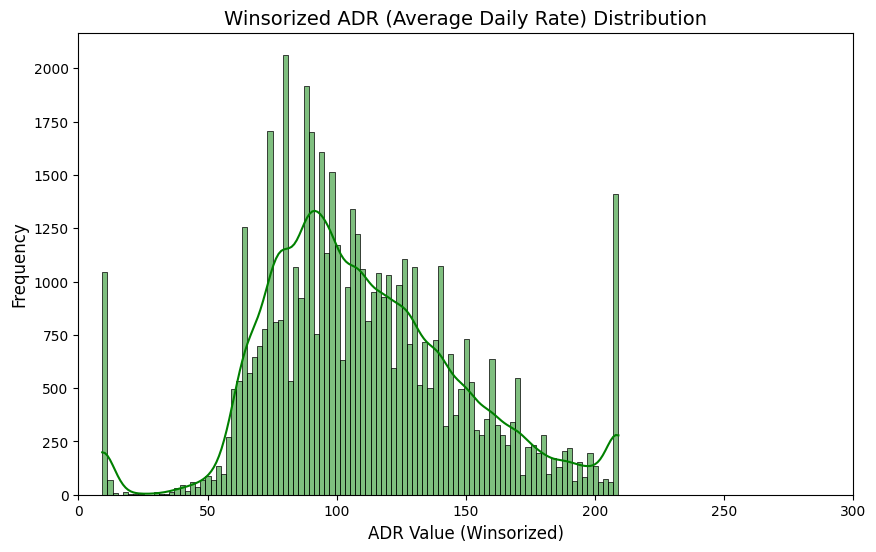

,Original ADR,Winsorized ADR
count,53274.000000,53274.000000
mean,111.271969,110.611881
std,47.801588,39.221441
min,0.000000,9.225000
25%,84.150000,84.150000
50%,105.300000,105.300000
75%,134.100000,134.100000
max,5400.000000,209.025000


In [25]:
# Let's limit the ADR values ​​according to the lower and upper limits (winsorizing).
df['ADR_winsorized'] = df['ADR'].clip(lower=lower_bound, upper=upper_bound)

# Visualize the distribution of winsorized ADR
plt.figure(figsize=(10, 6))
sns.histplot(df['ADR_winsorized'], bins=100, kde=True, color='green')
plt.title('Winsorized ADR (Average Daily Rate) Distribution', fontsize=14)
plt.xlabel('ADR Value (Winsorized)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 300)  # Limit the x-axis to 300
plt.show()

# Summary statistics of ADR and winsorized ADR
original_vs_winsorized = pd.DataFrame({
    "Original ADR": df['ADR'].describe(),
    "Winsorized ADR": df['ADR_winsorized'].describe()
})

original_vs_winsorized

In [26]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ADR_winsorized
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03,9.225
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01,76.500
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30,68.000
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23,76.500
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02,76.500


In [27]:
# Drop the original ADR column
df.drop('ADR', axis=1, inplace=True)